In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [141]:
Index = input('Enter Index: ')
S1 = input('Enter Stock 1: ')
S2 = input('Enter Stock 2: ')
S3 = input('Enter Stock 3: ')
Date =input('Enter starting date in YYYY-MM-DD format: ')
Amt_Invested = 10000

Enter Index: ^NSEI
Enter Stock 1: HDFCBANK.NS
Enter Stock 2: SBIN.NS
Enter Stock 3: AXISBANK.NS
Enter starting date in YYYY-MM-DD format: 2022-01-01


In [142]:
start = dt.strptime(Date,'%Y-%m-%d')
end = dt.now()

In [143]:
tickers = [str(Index),str(S1),str(S2),str(S3)]
df = pd.DataFrame()
for t in tickers:
    data = yf.download(t,start,end,'1d')['Adj Close']
    df[t] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Individual VAR and ES

In [144]:
for t in tickers:
    df[t + ' Return'] = (df[t].pct_change().dropna())
df = df[1:]
df.head()

,^NSEI,HDFCBANK.NS,SBIN.NS,AXISBANK.NS,^NSEI Return,HDFCBANK.NS Return,SBIN.NS Return,AXISBANK.NS Return
Date,,,,,,,,
2022-01-04,17805.250000,1493.850464,466.995483,706.618469,0.010187,0.005857,0.026975,0.018382
2022-01-05,17925.250000,1529.326416,475.591675,724.305115,0.006740,0.023748,0.018407,0.025030
2022-01-06,17745.900391,1504.796143,474.915588,727.692993,-0.010005,-0.016040,-0.001422,0.004677
2022-01-07,17812.699219,1515.351074,474.480927,727.991943,0.003764,0.007014,-0.000915,0.000411
2022-01-10,18003.300781,1523.755737,486.457672,740.148315,0.010700,0.005546,0.025242,0.016698


In [145]:
returns_lists = [list(df[t + ' Return']) for t in tickers]

for i in range(len(returns_lists)):
    returns_lists[i] = sorted(returns_lists[i])


In [146]:
Var = []
ES = []
length = len(returns_lists[0])
for i in range(len(returns_lists)):
    a = round(0.05*length,0)
    b = a - 1
    SUM = sum(returns_lists[i][:int(b)])
    COUNT = len(returns_lists[i][:int(b)])
    Var.append(-returns_lists[i][int(a)] * 100)
    ES.append(-(SUM/COUNT)*100)
    

In [147]:
for VAR,Tickers in zip(Var,tickers):
    print('Var at 95% CI for ' + Tickers + ' is ' + str(VAR) + '%')

Var at 95% CI for ^NSEI is 1.5280363131582653%
Var at 95% CI for HDFCBANK.NS is 2.2541392989511744%
Var at 95% CI for SBIN.NS is 2.2514459997061365%
Var at 95% CI for AXISBANK.NS is 2.410800404602198%


In [148]:
for Es,Tickers in zip(ES,tickers):
    print('ES at 95% CI for ' + Tickers + ' is ' + str(Es) + '%')

ES at 95% CI for ^NSEI is 2.2418243860339313%
ES at 95% CI for HDFCBANK.NS is 3.436746226585643%
ES at 95% CI for SBIN.NS is 3.5768445806985607%
ES at 95% CI for AXISBANK.NS is 3.6417305444915256%


# Efficient Frontier

In [149]:
returns = df[[str(S1) + ' Return',str(S2) + ' Return',str(S3) + ' Return']]
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(returns.columns)

portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    portfolio_returns.append(np.sum(mean_returns * weights) * 250) 
    portfolio_volatility.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 250, weights))))
    sharpe_ratio.append(portfolio_returns[x]/portfolio_volatility[x])

portfolio_data = pd.DataFrame({'Return': portfolio_returns,'Volatility': portfolio_volatility,'Sharpe Ratio': sharpe_ratio,'Weights 1 ': weights[0],'Weights 2 ': weights[1],'Weights 3 ': weights[2]})



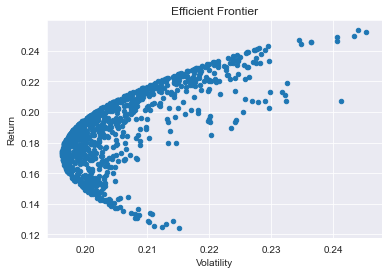

In [150]:
portfolio_data.plot(x='Volatility', y='Return', kind='scatter')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()


In [151]:
portfolio_data.head()

,Return,Volatility,Sharpe Ratio,Weights 1,Weights 2,Weights 3
0,0.186555,0.198314,0.940706,0.288393,0.59749,0.114117
1,0.190330,0.198710,0.957825,0.288393,0.59749,0.114117
2,0.202493,0.203316,0.995953,0.288393,0.59749,0.114117
3,0.207755,0.206157,1.007750,0.288393,0.59749,0.114117
4,0.163730,0.204814,0.799409,0.288393,0.59749,0.114117


In [152]:
portfolio_data_reset = portfolio_data.reset_index()
Minvar = min(portfolio_data['Volatility'])
Minvar_return = portfolio_data_reset.iloc[portfolio_data['Volatility'].idxmin(), 1]
value1 = portfolio_data_reset.iloc[portfolio_data['Volatility'].idxmin(), 6]
value2 = portfolio_data_reset.iloc[portfolio_data['Volatility'].idxmin(), 5]
value3 = portfolio_data_reset.iloc[portfolio_data['Volatility'].idxmin(), 4]
value4 = portfolio_data_reset.iloc[portfolio_data['Volatility'].idxmin(), 3]
print('Global Minimum variance portfolio has: ' + '\n')
print('Variance of ' + str(Minvar*100) + '%')
print('Return of ' + str(Minvar_return*100) + '%')
print('Weight in ' + tickers[1] + ' '+str(value1*100)+'%')
print('Weight in ' + tickers[2] + ' '+str(value2*100)+'%')
print('Weight in ' + tickers[3] + ' '+str(value3*100)+'%')
print('Sharpe Ratio is: ' + str(value2))

Global Minimum variance portfolio has: 

Variance of 19.622555786418484%
Return of 17.343048147249892%
Weight in HDFCBANK.NS 11.411721052989417%
Weight in SBIN.NS 59.74900705620828%
Weight in AXISBANK.NS 28.839271890802305%
Sharpe Ratio is: 0.5974900705620828


# Sharpe Optimal

sharpe (is incorrect), individual, component, marginal var left

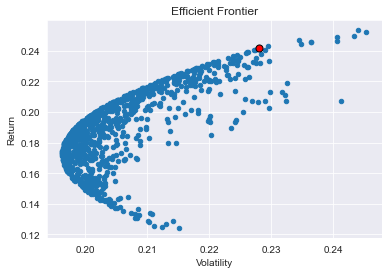

In [153]:
portfolio_data.plot(x='Volatility', y='Return', kind='scatter')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(portfolio_data_reset.iloc[portfolio_data['Sharpe Ratio'].idxmax(), 2], portfolio_data_reset.iloc[portfolio_data['Sharpe Ratio'].idxmax(), 1], c='red', s=50, edgecolors='black')

In [154]:
def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum(mean_returns * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 250, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [155]:
from scipy.optimize import minimize

In [156]:
def neg_sharpe(weights): 
    return get_ret_vol_sr(weights)[2] * -1

In [157]:
def check_sum(weights): 
    return np.sum(weights) - 1
#this constrain is satisified when the output is 0
def max_weight(weights):
    return -(np.max(weights) - 0.5)
def min_weight(weights):
    return (np.min(weights) - 0.25)
#this constrain is satisified when the output is non negative value 

In [158]:
cons = ({'type':'eq','fun':check_sum}, {'type':'ineq','fun':max_weight},{'type':'ineq','fun':min_weight})

bounds = ((0,1),(0,1),(0,1))

In [159]:
init_guess = [0.25, 0.25, 0.5]

opt_results = minimize(neg_sharpe, init_guess, bounds=bounds, constraints=cons)

In [160]:
opt_results

     fun: -1.0131456965552295
     jac: array([ 0.27053092, -0.04415843, -0.11318624])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.25, 0.25, 0.5 ])

In [161]:
opt_results = opt_results.x.round(2)*100
opt_results

array([25., 25., 50.])

# Global Minimum Variance weight  vs Sharpe Optimal weight

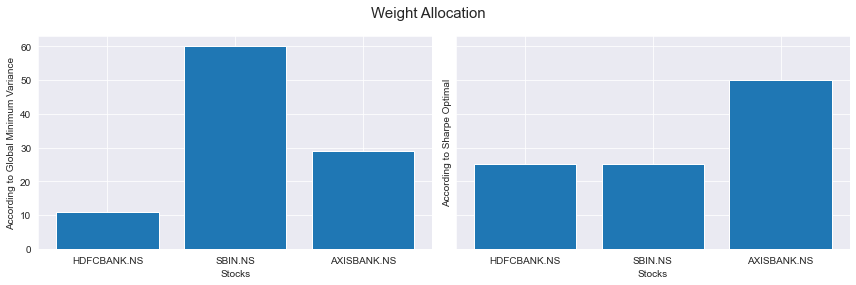

In [180]:
Companies = [S1,S2,S3]
Glob_weight = [round(value1, 2) * 100, round(value2, 1) * 100, round(value3, 2) * 100]
Sh_weight = list(opt_results)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].bar(Companies, Glob_weight)
ax[0].set_ylabel("According to Global Minimum Variance")
ax[0].set_xlabel("Stocks")

ax[1].bar(Companies, Sh_weight)
ax[1].set_ylabel("According to Sharpe Optimal")
ax[1].set_xlabel("Stocks")

fig.suptitle("Weight Allocation",size = 15)
fig.tight_layout()
plt.show()

# Marginal Var

In [163]:
df['Sharpee Portfolio'] = np.dot(np.array(returns),((opt_results.T)/100))

In [164]:
df

,^NSEI,HDFCBANK.NS,SBIN.NS,AXISBANK.NS,^NSEI Return,HDFCBANK.NS Return,SBIN.NS Return,AXISBANK.NS Return,Sharpee Portfolio
Date,,,,,,,,,
2022-01-04,17805.250000,1493.850464,466.995483,706.618469,0.010187,0.005857,0.026975,0.018382,0.017399
2022-01-05,17925.250000,1529.326416,475.591675,724.305115,0.006740,0.023748,0.018407,0.025030,0.023054
2022-01-06,17745.900391,1504.796143,474.915588,727.692993,-0.010005,-0.016040,-0.001422,0.004677,-0.002027
2022-01-07,17812.699219,1515.351074,474.480927,727.991943,0.003764,0.007014,-0.000915,0.000411,0.001730
2022-01-10,18003.300781,1523.755737,486.457672,740.148315,0.010700,0.005546,0.025242,0.016698,0.016046
...,...,...,...,...,...,...,...,...,...
2023-07-03,19322.550781,1719.800049,585.450012,980.083679,0.006957,0.010815,0.021995,-0.005418,0.005493
2023-07-04,19389.000000,1728.199951,589.250000,968.707153,0.003439,0.004884,0.006491,-0.011608,-0.002960
2023-07-05,19398.500000,1673.300049,590.599976,964.515747,0.000490,-0.031767,0.002291,-0.004327,-0.009532


In [165]:
std =(df['Sharpee Portfolio'].std())
cov =np.dot(cov_matrix,(opt_results.T)/100)
z = 1.65
Mvar = []
for i in range(len(tickers)-1):
    Mvar.append(cov[i]*1.96/std)
for mvar,stock in zip(Mvar,tickers[1:]):
    print('Marginal Var of ',stock,'is',mvar)

Marginal Var of  HDFCBANK.NS is 0.01923584179689565
Marginal Var of  SBIN.NS is 0.024451893681093337
Marginal Var of  AXISBANK.NS is 0.029133459638365097


# Component Var

In [166]:
Cvar_abs = []
for i in range(len(tickers)-1): 
    Cvar_abs.append(Mvar[i]*opt_results[i]*Amt_Invested)
Cvar_per = []
for i in range(len(tickers) - 1):
    Cvar_per.append(Cvar_abs[i]*100/sum(Cvar_abs))
for cvar_ab,cvar_p,stock in zip(Cvar_abs,Cvar_per,tickers[1:]):
    print('Component Var of ',stock,'is',cvar_ab,'or',round(cvar_p,2),'% of the total portfolio.')

Component Var of  HDFCBANK.NS is 4808.960449223912 or 18.87 % of the total portfolio.
Component Var of  SBIN.NS is 6112.973420273334 or 23.98 % of the total portfolio.
Component Var of  AXISBANK.NS is 14566.729819182548 or 57.15 % of the total portfolio.


# Marginal Var Optimisation

In [167]:
Company = [str(S1),str(S2),str(S3)]
rfr = 0.05

delta = (end-start).days/365
AR = []
for i in range(len(tickers)-1):
    column_name = df.columns[i+1]
    first_value = df[column_name].iloc[0]
    last_value = df[column_name].iloc[-1]
    AR.append((last_value/first_value)**(1/delta)-1)
AR

[0.07198861389735867, 0.17088855274514425, 0.23723164638369587]

In [168]:
def equal_er(weights):
    ret = np.sum(mean_returns * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 250, weights)))
    cov =np.dot(cov_matrix,(opt_results.T)/100)
    z = 1.65
    Mvar = []
    er = []
    for i in range(len(tickers)-1):
        Mvar.append(cov[i]*1.96/vol)
        er.append(AR[i]-rfr/Mvar[i])
    return 2*er[0]-er[1]-er[2]

In [169]:
def check_sum(weights): 
    return np.sum(weights) - 1
#this constrain is satisified when the output is 0
def max_weight(weights):
    return -(np.max(weights) - 0.5)
def min_weight(weights):
    return (np.min(weights) - 0.25)
#this constrain is satisified when the output is non negative value 

In [170]:
cons = ({'type':'eq','fun':check_sum}, {'type':'ineq','fun':max_weight},{'type':'ineq','fun':min_weight})

bounds = ((0,1),(0,1),(0,1))

In [171]:
init_guess = [0.25, 0.25, 0.5]

opt_results2 = minimize(equal_er, init_guess,method='SLSQP', bounds=bounds, constraints=cons)

In [172]:
opt_results2

     fun: -22.993925028111164
     jac: array([-17.15376353, -21.80523157, -25.98006787])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.25, 0.25, 0.5 ])

# Minimum Variance vs Sharpee optimal vs Mvar optimal

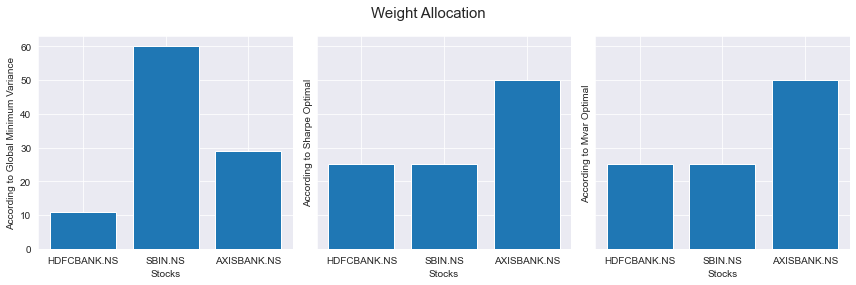

In [178]:
Companies = [S1,S2,S3]
Glob_weight = [round(value1, 2) * 100, round(value2, 1) * 100, round(value3, 2) * 100]
Sh_weight = list(opt_results)
mvar_weight = list(opt_results2.x.round(2) * 100)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

ax[0].bar(Companies, Glob_weight)
ax[0].set_ylabel("According to Global Minimum Variance")
ax[0].set_xlabel("Stocks")

ax[1].bar(Companies, Sh_weight)
ax[1].set_ylabel("According to Sharpe Optimal")
ax[1].set_xlabel("Stocks")

ax[2].bar(Companies, mvar_weight)
ax[2].set_ylabel("According to Mvar Optimal")
ax[2].set_xlabel("Stocks")

fig.suptitle("Weight Allocation", size=15)
fig.tight_layout()
plt.show()
